  # 1. Используя один из подходящих игрушечных датасетов (breast_canser, digits, diabetes …) применить алгоритмы улучшения качества и оценки моделей (перекрестная проверка, решетчатый поиск, метрики модели)

Я выбрал датасет load_breast_cancer и для него применю алгоритмы улучшения качества и оценки моделей (перекрестная проверка, решетчатый поиск, метрики модели)

## Перекрестная проверка

### Перекрестная проверка в scikit-learn

In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

breast_cancer = load_breast_cancer()
logreg = LogisticRegression(max_iter=1000)

scores = cross_val_score(logreg, breast_cancer.data, breast_cancer.target)
print("Cross-validation scores: {}".format(scores))

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

Cross-validation scores: [0.93859649 0.94736842 0.97368421 0.94736842 0.96460177]


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [2]:
# С помощью параметра cv можно изменить количество блоков
scores = cross_val_score(logreg, breast_cancer.data, breast_cancer.target, cv=5)
print("Cross-validation scores: {}".format(scores))

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

Cross-validation scores: [0.93859649 0.94736842 0.97368421 0.94736842 0.96460177]


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [3]:
# Наиболее распространенный способ подытожить правильность, вычисленную в ходе перекрестной проверки, – это вычисление среднего значения: 
print("Средняя правильность перекрестной проверки: {:.2f}".format(scores.mean()))

Средняя правильность перекрестной проверки: 0.95


Используя усредненное значение правильности для перекрестной проверки, мы можем сделать вывод, что средняя правильность модели составит примерно 95%. 

Взглянув на все пять значений правильности, полученных в ходе пятиблочной перекрестной проверки, можно еще сделать вывод о том, что существует относительно не высокий разброс значений правильности, вычисленных для блоков, от 95% до 93%. Подобный результат может означать, что у нас достаточно много данных в модели.

### Преимущества перекрестной проверки

In [4]:
from sklearn.model_selection import cross_validate
res = cross_validate(logreg, breast_cancer.data, breast_cancer.target, cv=5,
                     return_train_score=True)
display(res)

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

{'fit_time': array([0.36836267, 0.34457254, 0.36767173, 0.35223031, 0.34566903]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_score': array([0.93859649, 0.94736842, 0.97368421, 0.94736842, 0.96460177]),
 'train_score': array([0.95604396, 0.96043956, 0.95164835, 0.96923077, 0.95614035])}

In [5]:
import pandas as pd
res_df = pd.DataFrame(res)
display(res_df)
print("Mean times and scores:\n", res_df.mean())

,fit_time,score_time,test_score,train_score
0,0.368363,0.0,0.938596,0.956044
1,0.344573,0.0,0.947368,0.960440
2,0.367672,0.0,0.973684,0.951648
3,0.352230,0.0,0.947368,0.969231
4,0.345669,0.0,0.964602,0.956140


Mean times and scores:
 fit_time       0.355701
score_time     0.000000
test_score     0.954324
train_score    0.958701
dtype: float64


С помощью функции cross_validate можно узнать за сколько времени выполнилось оценка правильности.

## Стратифицированная k-блочная перекрестная проверка и другие стратегии

In [6]:
print("Метки:\n{}".format(breast_cancer.target))

Метки:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0

Данные breast_cancer расположены хаотично, не как iris. В лабораторной было сказано, что использовать стандартную k-блочную перекрестную проверку нехорошая идея, потому что в некоторых датасетах данные расположены по порядку

### Больше контроля над перекрестной проверкой

In [7]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [8]:
print("Значения правильности перекрестной проверки:\n{}".format(cross_val_score(logreg, breast_cancer.data, breast_cancer.target, cv=kfold)))

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

Значения правильности перекрестной проверки:
[0.9122807  0.95614035 0.96491228 0.97368421 0.94690265]


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
kfold = KFold(n_splits=3)
print("Значения правильности перекрестной проверки:\n{}".format(cross_val_score(logreg, breast_cancer.data, breast_cancer.target, cv=kfold)))

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

Значения правильности перекрестной проверки:
[0.92105263 0.97368421 0.94708995]


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Значения правильности перекрестной проверки:\n{}".format(cross_val_score(logreg, breast_cancer.data, breast_cancer.target, cv=kfold)))

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

Значения правильности перекрестной проверки:
[0.96842105 0.93157895 0.95238095]


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Перекрестная проверка с исключением по одному

In [11]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, breast_cancer.data, breast_cancer.target, cv=loo)
print("Количество итераций: ", len(scores))
print("Средняя правильность: {:.2f}".format(scores.mean()))

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

Количество итераций:  569
Средняя правильность: 0.95


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Данная методика занимает много времени, если в датасете очень много данных.

### Перекрестная проверка со случайными перестановками при разбиении

In [12]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, breast_cancer.data, breast_cancer.target, cv=shuffle_split)
print("Значения правильности перекрестной проверки:\n{}".format(scores))

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

Значения правильности перекрестной проверки:
[0.94736842 0.95087719 0.95087719 0.96842105 0.95789474 0.94736842
 0.95789474 0.94035088 0.95789474 0.94385965]


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

### Перекрестная проверка с использованием групп

In [13]:
from sklearn.model_selection import GroupKFold
from sklearn.datasets import make_blobs
# создаем синтетический набор данных
X, y = make_blobs(n_samples=12, random_state=0)
# предположим, что первые три примера относятся к одной и той же группе
# затем следующие четыре и так далее
groups = [0,0,0,1,1,1,1,2,2,3,3,3]
scores = cross_val_score(logreg, X, y, groups=groups, scoring=None, cv=GroupKFold(n_splits=3))
print("Значения правильности перекрестной проверки:\n{}".format(scores))

Значения правильности перекрестной проверки:
[0.75       0.6        0.66666667]


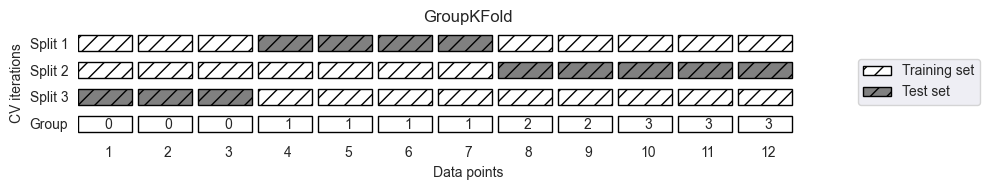

In [14]:
import mglearn
mglearn.plots.plot_group_kfold()

## Решетчатый поиск

### Простой решетчатый поиск

In [15]:
# реализация наивного решетчатого поиска from sklearn.svm import SVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, random_state=0)
print("Размер обучающего набора: {} размер тестового набора: {}".format(X_train.shape[0], X_test.shape[0]))
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the  test set
        score = svm.score(X_test, y_test)
        # if we got  a better score, store  the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
print("Наилучшее значение правильности: {:.2f}".format(best_score))
print("Наилучшее значение параметров: {}".format(best_parameters))

Размер обучающего набора: 426 размер тестового набора: 143
Наилучшее значение правильности: 0.93
Наилучшее значение параметров: {'C': 1, 'gamma': 0.001}


### Опасность переобучения параметров и проверочный набор данных

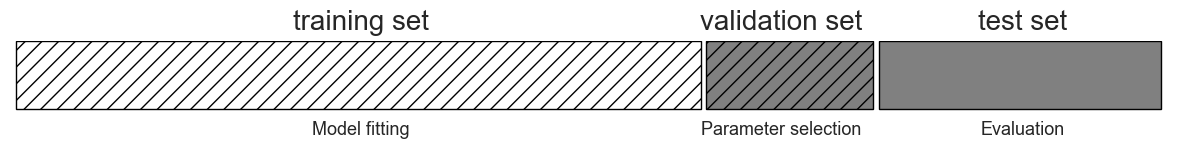

In [16]:
mglearn.plots.plot_threefold_split()

In [17]:
# разбиваем данные на обучающий + проверочный набор и тестовый набор
X_trainval, X_test, y_trainval, y_test = train_test_split(breast_cancer.data, breast_cancer.target, random_state=0)
# разбираем обучающий + проверочный набор на обучающий и проверочный наборы
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)
print("Размер обучающего набора: {} размер проверочного набора: {} размер тестового набора:" " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # для каждой комбинации параметров обучаем SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # оцениваем качество SVC на тестовом наборе
        score = svm.score(X_valid, y_valid)
        # если получаем наилучшее значение правильности, сохраняем значение и параметры
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# заново строим модель на наборе, полученном в результате объединения обучающих и проверочных данных, оцениваем качество модели на тестовом наборе
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Лучшее значение правильности на проверочном наборе: {:.2f}".format(best_score))
print("Наилучшие значения параметров: ", best_parameters)
print("Правильность на тестовом наборе с наилучшими параметрами: {:.2f}".format(test_score))

Размер обучающего набора: 319 размер проверочного набора: 107 размер тестового набора: 143
Лучшее значение правильности на проверочном наборе: 0.94
Наилучшие значения параметров:  {'C': 1, 'gamma': 0.001}
Правильность на тестовом наборе с наилучшими параметрами: 0.93


### Решетчатый поиск с перекрестной проверкой

In [18]:
import numpy as np
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # для каждой комбинации параметров обучаем SVC
        svm = SVC(gamma=gamma, C=C)
        # выполняем перекрестную проверку
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # вычисляем среднюю правильность перекрестной проверки
        score = np.mean(scores)
        # если получаем лучшее значение правильности, сохраняем значение  и параметры
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# заново строим модель на наборе, полученном в результате объединения обучающих и проверочных данных
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=1, gamma=0.001)

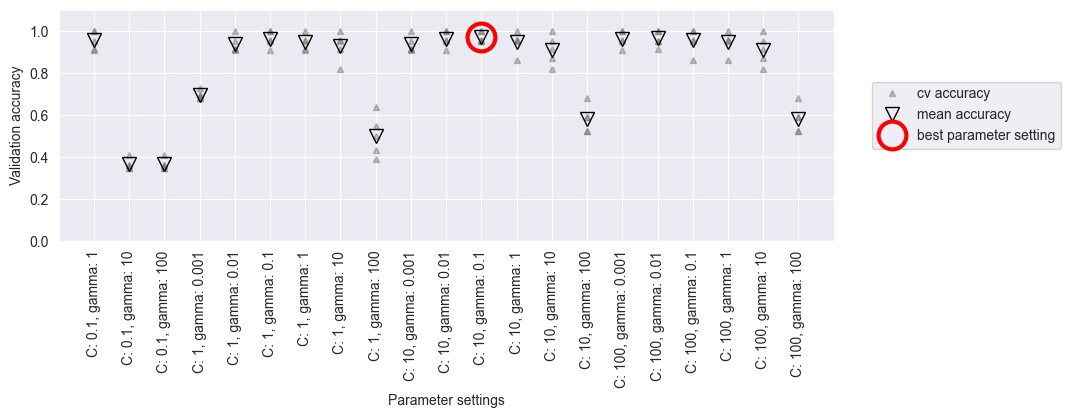

In [19]:
mglearn.plots.plot_cross_val_selection()

Результаты решетчатого поиска с перекрестной проверкой

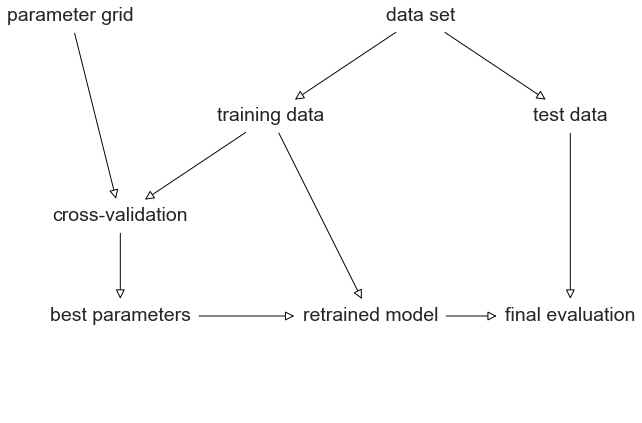

In [20]:
mglearn.plots.plot_grid_search_overview()

Процесс отбора параметров и оценки модели с помощью GridSearchCV

In [21]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Сетка параметров:\n{}".format(param_grid))

Сетка параметров:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [22]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, random_state=0)
grid_search.fit(X_train, y_train)
print("Правильность на тестовом наборе: {:.2f}".format(grid_search.score(X_test, y_test)))

print("Наилучшее значение параметров: {}".format(grid_search.best_params_))
print("Наилучшее значение кросс-валидац. правильности: {:.2f}".format(grid_search.best_score_))

Правильность на тестовом наборе: 0.93
Наилучшее значение параметров: {'C': 1, 'gamma': 0.001}
Наилучшее значение кросс-валидац. правильности: 0.92


In [23]:
print("Наилучшая модель:\n{}".format(grid_search.best_estimator_))

Наилучшая модель:
SVC(C=1, gamma=0.001)


Есть класс GridSearchCV. С его помощью легко и удобно построить модель решетчатого поиска с перекрестной проверкой, чем найти с двумя циклами на примере сверху.

У класса GridSearchCV есть переменные best_params_, best_score_. Там хранятся наилучшие значения параметров и правильности кросс-валидации.

### Анализ результатов перекрестной проверки

In [24]:
# convert to Dataframe
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007776,0.006991,0.014311,0.002647,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,6
1,0.015714,0.000164,0.009378,0.007657,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,6
2,0.015049,0.002123,0.007253,0.009024,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,6
3,0.015707,0.000155,0.009456,0.007722,0.001,1,"{'C': 0.001, 'gamma': 1}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,6
4,0.022986,0.007050,0.005227,0.006603,0.001,10,"{'C': 0.001, 'gamma': 10}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,6


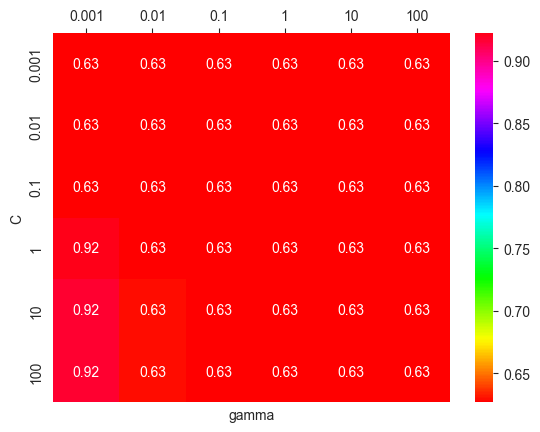

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
scores = np.array(results.mean_test_score).reshape(6, 6)

# строим тепловую карту средних значений правильности перекрестной проверки
ax = sns.heatmap(scores, annot=True, xticklabels=param_grid['gamma'], yticklabels=param_grid['C'], cmap='hsv')
ax.set(xlabel="gamma", ylabel="C")
ax.xaxis.tick_top()

plt.show()

### Экономичный решетчатый поиск

In [26]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids:\n{}".format(param_grid))

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [27]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Наилучшее значение параметров: {}".format(grid_search.best_params_))
print("Наилучшее значение кросс-валидац. правильности: {:.2f}".format(grid_search.best_score_))

Наилучшее значение параметров: {'C': 0.1, 'kernel': 'linear'}
Наилучшее значение кросс-валидац. правильности: 0.96


In [28]:
results = pd.DataFrame(grid_search.cv_results_)
# мы выводим транспонированную таблицу для лучшего отображения на странице: display(results.T)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.020262,0.006229,0.008005,0.007050,0.001,0.001,rbf,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,12
1,0.016516,0.001578,0.014907,0.001447,0.001,0.01,rbf,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,12
2,0.028310,0.006140,0.009357,0.007640,0.001,0.1,rbf,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,12
3,0.031339,0.000154,0.003126,0.006251,0.001,1,rbf,"{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,12
4,0.019439,0.006222,0.015107,0.001047,0.001,10,rbf,"{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,12
5,0.017032,0.007859,0.008055,0.007007,0.001,100,rbf,"{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,12
6,0.015708,0.000156,0.003127,0.006253,0.01,0.001,rbf,"{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,12
7,0.018834,0.006407,0.008554,0.007144,0.01,0.01,rbf,"{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,12
8,0.029117,0.004486,0.003127,0.006254,0.01,0.1,rbf,"{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,12
9,0.015708,0.000158,0.009379,0.007658,0.01,1,rbf,"{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,12


### Вложенная перекрестная проверка

In [29]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5), breast_cancer.data, breast_cancer.target, cv=5)
print("Значения правильности перекрестной проверки: ", scores)
print("Среднее значение правильности перекрестной проверки: ", scores.mean())

Значения правильности перекрестной проверки:  [0.93859649 0.92982456 0.97368421 0.92105263 0.98230088]
Среднее значение правильности перекрестной проверки:  0.9490917559385188


In [30]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    # для каждого разбиения данных во внешней перекрестной проверке 
    # (метод split возвращает индексы)   
    for training_samples, test_samples in outer_cv.split(X, y):
        # находим наилучшие параметры с помощью внутренней перекрестной проверки  
        best_params = {}
        best_score = -np.inf
        # итерируем по параметрам   
        for parameters in parameter_grid:
             # собираем значения правильности по всем внутренним разбиениям 
            cv_scores = []
             # итерируем по разбиениям внутренней перекрестной проверки 
            for inner_train, inner_test in inner_cv.split(
                    X[training_samples], y[training_samples]):
                # строим классификатор с данными параметрами на внутреннем обучающем наборе
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
               # оцениваем качество на внутреннем тестовом наборе
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            # вычисляем среднее значение правильности по внутренним блокам
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                # если лучше, чем предыдущие, запоминаем параметры 
                best_score = mean_score
                best_params = parameters
        # строим классификатор с лучшими параметрами на внешнем обучающем наборе
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        # оцениваем качество на внешнем тестовом наборе 
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

In [31]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(breast_cancer.data, breast_cancer.target, StratifiedKFold(5), StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print("Значения правильности перекрестной проверки: {}".format(scores))

Значения правильности перекрестной проверки: [0.93859649 0.93859649 0.97368421 0.94736842 0.95575221]


## Метрики качества моделей и их вычисление

### Метрики бинарной классификации

### Несбалансированный набор ошибок

In [32]:
y = breast_cancer.target == 1

X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, y, random_state=0)

In [33]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Уникальные спрогнозированные метки: {}".format(np.unique(pred_most_frequent)))
print("Правильность на тестовом наборе: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Уникальные спрогнозированные метки: [ True]
Правильность на тестовом наборе: 0.63


In [34]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Правильность на тестовом наборе: {:.2f}".format(tree.score(X_test, y_test)))

Правильность на тестовом наборе: 0.94


In [35]:
from sklearn.linear_model import LogisticRegression
dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("Правильность dummy: {:.2f}".format(dummy.score(X_test, y_test)))
logreg = LogisticRegression(C=0.1, max_iter=1000).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("Правильность logreg: {:.2f}".format(logreg.score(X_test, y_test)))

Правильность dummy: 0.63
Правильность logreg: 0.94


### Матрица ошибок

In [36]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[52  1]
 [ 7 83]]


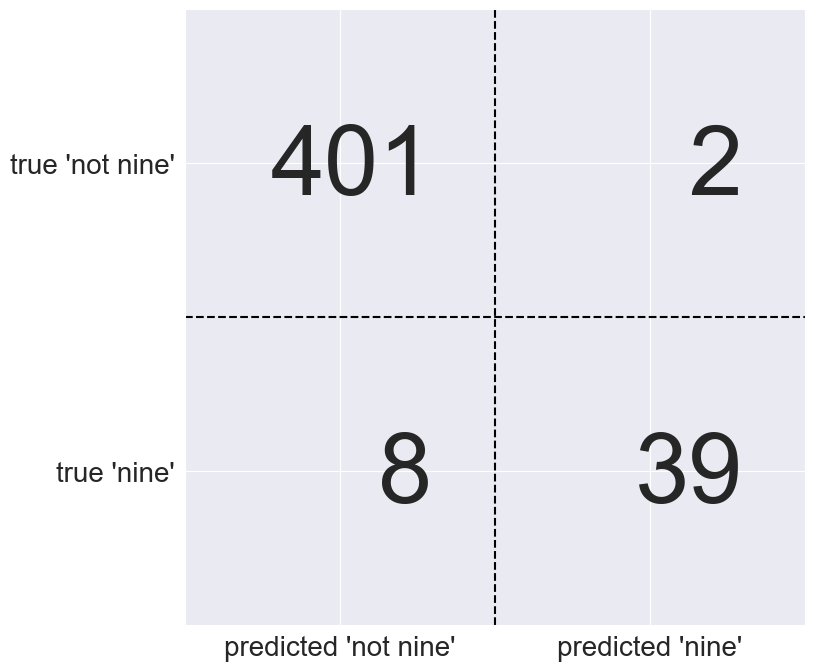

In [37]:
mglearn.plots.plot_confusion_matrix_illustration()

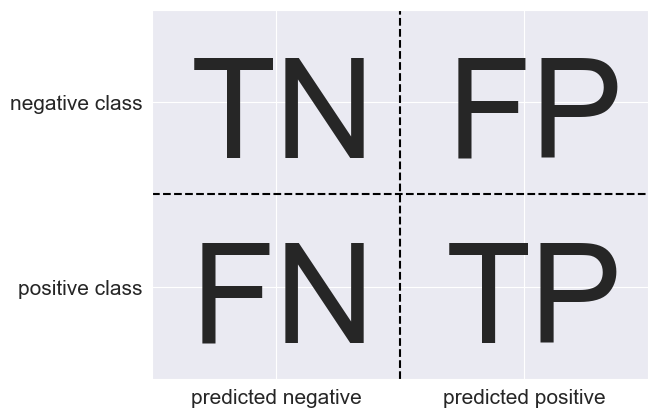

In [38]:
mglearn.plots.plot_binary_confusion_matrix()

In [39]:
print("Наиболее часто встречающийся класс:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nДамми-модель:")
print(confusion_matrix(y_test, pred_dummy))
print("\nДерево решений:")
print(confusion_matrix(y_test, pred_tree))
print("\nЛогистическая регрессия:")
print(confusion_matrix(y_test, pred_logreg))

Наиболее часто встречающийся класс:
[[ 0 53]
 [ 0 90]]

Дамми-модель:
[[ 0 53]
 [ 0 90]]

Дерево решений:
[[48  5]
 [ 4 86]]

Логистическая регрессия:
[[52  1]
 [ 7 83]]


### Связь с правильностью

\begin{equation*}
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
\end{equation*}

### Точность, полнота и F-мера

\begin{equation*}
\text{Precision} = \frac{TP}{TP + FP}
\end{equation*}

\begin{equation*}
\text{Recall} = \frac{TP}{TP + FN}
\end{equation*}

\begin{equation*}
\text{F} = 2 * \frac{precision * recall}{precision + recall}
\end{equation*}

In [40]:
from sklearn.metrics import f1_score
print("f1-мера наибольшая частота: {:.2f}".format(f1_score(y_test, pred_most_frequent)))
print("f1-мера дамми: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("f1-мера дерево: {:.2f}".format(f1_score(y_test, pred_tree)))
print("f1-мера логистическая регрессия: {:.2f}".format(f1_score(y_test, pred_logreg)))

f1-мера наибольшая частота: 0.77
f1-мера дамми: 0.77
f1-мера дерево: 0.95
f1-мера логистическая регрессия: 0.95


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent, target_names=["not 1", "1"]))

              precision    recall  f1-score   support

       not 1       0.00      0.00      0.00        53
           1       0.63      1.00      0.77        90

    accuracy                           0.63       143
   macro avg       0.31      0.50      0.39       143
weighted avg       0.40      0.63      0.49       143


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

### Кривые точности - полноты и ROC-кривые

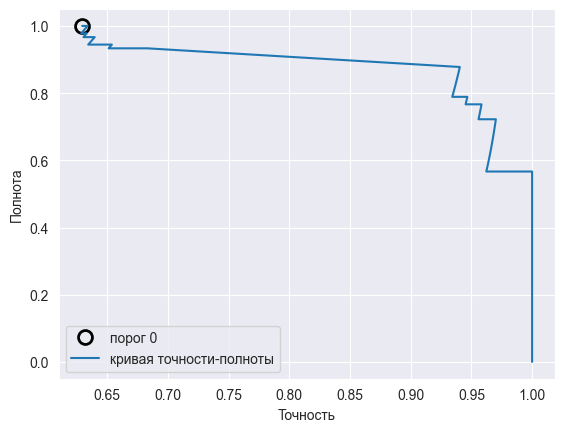

In [42]:
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))
# находим ближайший к нулю порог
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label="порог 0", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="кривая точности-полноты")
plt.xlabel("Точность")
plt.ylabel("Полнота")
plt.legend(loc="best")

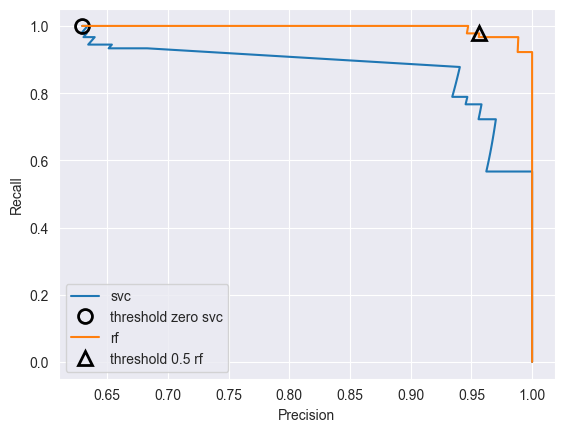

In [43]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifier has predict_proba, but not decision_function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
    y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label="svc")

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero svc", fillstyle="none", c='k', mew=2)

plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
         markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [44]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("Средняя точность random forest: {:.3f}".format(ap_rf))
print("Средняя точность svc: {:.3f}".format(ap_svc))

Средняя точность random forest: 0.998
Средняя точность svc: 0.944


### Метрики для мультиклассовой классификации

In [45]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))

Accuracy: 0.944
Confusion matrix:
[[51  2]
 [ 6 84]]


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


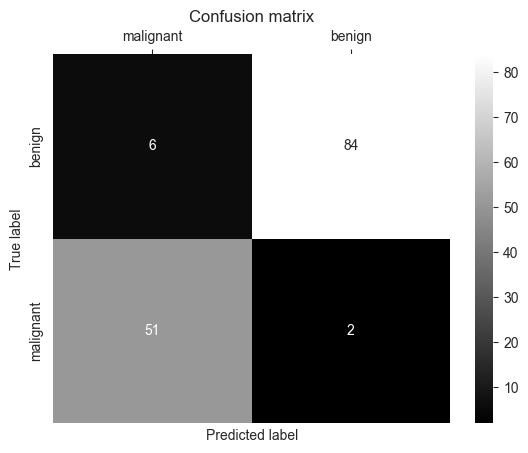

In [46]:
# строим тепловую карту средних значений правильности перекрестной проверки
ax = sns.heatmap(confusion_matrix(y_test, pred), annot=True, xticklabels=breast_cancer.target_names, yticklabels=breast_cancer.target_names, cmap='gray')
ax.set(xlabel='Predicted label', ylabel='True label')
ax.xaxis.tick_top()
plt.title("Confusion matrix")
plt.gca().invert_yaxis()
plt.show()

In [47]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93        53
           1       0.98      0.93      0.95        90

    accuracy                           0.94       143
   macro avg       0.94      0.95      0.94       143
weighted avg       0.95      0.94      0.94       143


In [48]:
print("Micro average f1 score: {:.3f}".format(f1_score(y_test, pred, average="micro")))
print("Macro average f1 score: {:.3f}".format(f1_score(y_test, pred, average="macro")))

Micro average f1 score: 0.944
Macro average f1 score: 0.941


## Метрики регрессии

### Использование метрик оценки для отбора модели

In [49]:
# метрика качества классификационной модели по умолчанию - правильность
print("Метрика качества по умолчанию: {}".format(cross_val_score(SVC(), breast_cancer.data, breast_cancer.target == 1)))
# значение параметра scoring="accuracy" не меняет результатов
explicit_accuracy = cross_val_score(SVC(), breast_cancer.data, breast_cancer.target == 1, scoring="accuracy")
print("Метрика качества явно заданная правильность: {}".format(explicit_accuracy))
roc_auc = cross_val_score(SVC(), breast_cancer.data, breast_cancer.target == 1, scoring="roc_auc")
print("Метрика качества AUC: {}".format(roc_auc))

Метрика качества по умолчанию: [0.85087719 0.89473684 0.92982456 0.94736842 0.9380531 ]
Метрика качества явно заданная правильность: [0.85087719 0.89473684 0.92982456 0.94736842 0.9380531 ]
Метрика качества AUC: [0.95447101 0.97772683 0.98148148 0.97189153 0.98423877]


In [50]:
from sklearn.metrics import roc_auc_score
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target == 1, random_state=0)

# задаем не самую удачную сетку параметров для иллюстрации:
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
# используем метрику по умолчанию, то есть правильность:
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("Решетчатый поиск с использованием правильности")
print("Наилучшие параметры", grid.best_params_)
print("Наилучшее значения перекрестной проверки (правильности): {:.3f}".format(grid.best_score_))
print("AUC на тестовом наборе: {:.3f}".format(roc_auc_score(y_test, grid.decision_function(X_test))))
print("Правильность на тестовом наборе: {:.3f}".format(grid.score(X_test, y_test)))

Решетчатый поиск с использованием правильности
Наилучшие параметры {'gamma': 0.0001}
Наилучшее значения перекрестной проверки (правильности): 0.939
AUC на тестовом наборе: 0.969
Правильность на тестовом наборе: 0.944


In [51]:
# используем метрику качества AUC:
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="roc_auc")
grid.fit(X_train, y_train)
print("\nРешетчатый поиск с использованием AUC")
print("Наилучшие параметры: ", grid.best_params_)
print("Наилучшее значение перекрестной проверки (AUC): {:.3f}".format(grid.best_score_))
print("AUC на тестовом наборе: {:.3f}".format(roc_auc_score(y_test, grid.decision_function(X_test))))
print("Правильность на тестовом наборе: {:.3f}".format(grid.score(X_test, y_test)))


Решетчатый поиск с использованием AUC
Наилучшие параметры:  {'gamma': 0.0001}
Наилучшее значение перекрестной проверки (AUC): 0.975
AUC на тестовом наборе: 0.969
Правильность на тестовом наборе: 0.969


# 2. Создать модель классификатор, которая по определенному обучаемому набору (salary, city, age, vacation_prefer, transport_prefer) будет определять предпочтения человека (target), в каком городе провести отпуск.

In [52]:
my_data = {'salary': [],
           'city': [],
           'age': [],
           'vacation_prefer': [],
           'transport_prefer': [],
           'target': []
           }

In [53]:
# создания списка salary
salary = [20000]
sum = 20000
while sum<100000:
    sum+=2000
    salary.append(sum)
print(salary[:10])

[20000, 22000, 24000, 26000, 28000, 30000, 32000, 34000, 36000, 38000]


In [54]:
# создание списка city
city = ['Bishkek', 'Djalal-Abad', 'Osh']

In [55]:
# создания списка vacation_prefer
vacation_prefer = ['Shopping', 'Beach holiday']
print(vacation_prefer)

['Shopping', 'Beach holiday']


In [56]:
# создания списка transport_prefer
transport_prefer = ['auto', 'plane']
print(transport_prefer)

['auto', 'plane']


In [57]:
# создания списка target
target = ['London', 'Paris', 'New York', 'Bangkok']
print(target)

['London', 'Paris', 'New York', 'Bangkok']


In [58]:
import random
for i in range(1000):
    my_data['salary'].append(random.choice(salary))
    my_data['city'].append(random.choice(city))
    my_data['age'].append(random.randint(30, 65))
    my_data['vacation_prefer'].append(random.choice(vacation_prefer))
    my_data['transport_prefer'].append(random.choice(transport_prefer))
    if my_data['salary'][-1] < 40000:
        my_data['target'].append('Bangkok')
    elif my_data['salary'][-1] > 40000 and my_data['salary'][-1] < 60000:
        my_data['target'].append(random.choice(['Bangkok', 'Paris']))
    elif my_data['salary'][-1] > 60000 and my_data['salary'][-1] < 80000:
        my_data['target'].append(random.choice(['Bangkok', 'Paris', 'London']))
    else:
        if my_data['vacation_prefer'][-1] == 'Beach holiday':
            my_data['target'].append(random.choice(['Bangkok', 'Paris', 'London']))
        else:
            if my_data['transport_prefer'][-1] == 'auto':
                my_data['target'].append(random.choice(['Bangkok', 'Paris', 'London']))
            else:
                my_data['target'].append(random.choice(target))

In [59]:
df = pd.DataFrame(my_data)
df

,salary,city,age,vacation_prefer,transport_prefer,target
0,62000,Osh,31,Shopping,plane,Paris
1,64000,Bishkek,60,Beach holiday,auto,Paris
2,76000,Osh,50,Beach holiday,auto,London
3,76000,Bishkek,59,Beach holiday,plane,London
4,94000,Djalal-Abad,54,Beach holiday,auto,Paris
...,...,...,...,...,...,...
995,78000,Osh,65,Shopping,auto,London
996,36000,Osh,54,Shopping,auto,Bangkok
997,90000,Djalal-Abad,53,Shopping,plane,Bangkok
998,56000,Djalal-Abad,37,Shopping,plane,Bangkok


In [60]:
df_encoded = pd.get_dummies(df, columns=['city', 'vacation_prefer', 'transport_prefer'])
df_encoded

,salary,age,target,city_Bishkek,city_Djalal-Abad,city_Osh,vacation_prefer_Beach holiday,vacation_prefer_Shopping,transport_prefer_auto,transport_prefer_plane
0,62000,31,Paris,0,0,1,0,1,0,1
1,64000,60,Paris,1,0,0,1,0,1,0
2,76000,50,London,0,0,1,1,0,1,0
3,76000,59,London,1,0,0,1,0,0,1
4,94000,54,Paris,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
995,78000,65,London,0,0,1,0,1,1,0
996,36000,54,Bangkok,0,0,1,0,1,1,0
997,90000,53,Bangkok,0,1,0,0,1,0,1
998,56000,37,Bangkok,0,1,0,0,1,0,1


In [61]:
df_without_target = df_encoded.drop('target', axis=1)
data = df_without_target.to_numpy()
print(data[:5])

[[62000    31     0     0     1     0     1     0     1]
 [64000    60     1     0     0     1     0     1     0]
 [76000    50     0     0     1     1     0     1     0]
 [76000    59     1     0     0     1     0     0     1]
 [94000    54     0     1     0     1     0     1     0]]


In [62]:
target = np.array(df_encoded['target'])
print(target)

['Paris' 'Paris' 'London' 'London' 'Paris' 'Paris' 'Paris' 'London'
 'London' 'Paris' 'Bangkok' 'Paris' 'Bangkok' 'Bangkok' 'Bangkok' 'London'
 'Bangkok' 'London' 'Paris' 'Bangkok' 'Paris' 'Bangkok' 'Paris' 'Bangkok'
 'London' 'Paris' 'Bangkok' 'Bangkok' 'Bangkok' 'Paris' 'Bangkok'
 'Bangkok' 'Paris' 'New York' 'Paris' 'Paris' 'Paris' 'Bangkok' 'Paris'
 'London' 'Bangkok' 'London' 'Bangkok' 'London' 'Bangkok' 'Bangkok'
 'Paris' 'London' 'Bangkok' 'London' 'Bangkok' 'Bangkok' 'Paris' 'Bangkok'
 'Bangkok' 'London' 'Bangkok' 'Paris' 'Paris' 'Paris' 'Paris' 'Bangkok'
 'Bangkok' 'Bangkok' 'London' 'London' 'London' 'Bangkok' 'Paris'
 'Bangkok' 'Bangkok' 'Paris' 'Bangkok' 'Bangkok' 'Bangkok' 'Bangkok'
 'Bangkok' 'Paris' 'London' 'London' 'Paris' 'London' 'Paris' 'Bangkok'
 'Bangkok' 'Paris' 'Bangkok' 'Bangkok' 'Paris' 'Paris' 'Bangkok' 'Bangkok'
 'Bangkok' 'London' 'Paris' 'Paris' 'Bangkok' 'Bangkok' 'Bangkok'
 'Bangkok' 'Bangkok' 'Bangkok' 'Bangkok' 'Paris' 'Paris' 'Bangkok' 'Paris'
 'Londo

In [63]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=0)

In [67]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [68]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Правильность на тестовом наборе: {:.2f}".format(grid_search.score(X_test, y_test)))

print("Наилучшее значение параметров: {}".format(grid_search.best_params_))
print("Наилучшее значение кросс-валидац. правильности: {:.2f}".format(grid_search.best_score_))

Правильность на тестовом наборе: 0.53
Наилучшее значение параметров: {'C': 1, 'gamma': 0.01}
Наилучшее значение кросс-валидац. правильности: 0.56


In [66]:
X_new = np.array([[60000, 40, 1, 0, 0, 1, 0, 1, 0]])
print("Форма массива X_new: {}".format(X_new.shape))

Форма массива X_new: (1, 9)


In [69]:
prediction = grid_search.predict(X_new)
print("Прогноз: {}".format(prediction))

Прогноз: ['Bangkok']
